<a href="https://colab.research.google.com/github/CynthiaGichuki/MachineLearning/blob/main/FINAL_PROJECT2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
import numpy as np
import pandas as pd
import os
import glob
from skimage import io
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [4]:
import os
dir = (r"/content/drive/MyDrive/Training")
classes = {'grade_0': 0, 'grade_1':1, 'grade_2':2, 'grade_3':3}


In [5]:
import cv2
from google.colab.patches import cv2_imshow
X = []
Y = []
for cls in classes:
  pth = '/content/drive/MyDrive/Training/'+cls
  for j in os.listdir(pth):
    img = cv2.imread(pth+'/'+j,0)
    #cv2_imshow(img)
    try:
       img = cv2.resize(img, (200,200))
       X.append(img)
       Y.append(classes[cls])
    except Exception as e:
      pass
    

   

In [6]:
np.unique(Y)

array([0, 1, 2, 3])

In [7]:
X = np.array(X)
Y = np.array(Y)

In [8]:
pd.Series(Y).value_counts()

3    44
0    32
1    13
2    11
dtype: int64

In [9]:
X.shape

(100, 200, 200)

VISUALIZE DATA

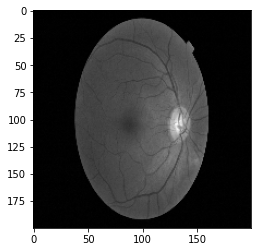

In [10]:
plt.imshow(X[0], cmap ='gray')

PREPARE DATA

In [11]:
X_updated = X.reshape(len(X), -1)
X_updated.shape

(100, 40000)

SPLIT DATA

In [12]:
xtrain, xtest, ytrain, ytest =  train_test_split(X_updated, Y, random_state=10, test_size=.20)

In [13]:
xtrain.shape, xtest.shape

((80, 40000), (20, 40000))

FEATURE SCALING

In [14]:
print(xtrain.max(),xtrain.min())
print(xtest.max(), xtest.min())
xtrain = xtrain/255
xtest = xtest/255
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())

246 0
245 0
0.9647058823529412 0.0
0.9607843137254902 0.0


FEATURE SELECTION: PCA

In [15]:
from sklearn.decomposition import PCA

In [16]:
print(xtrain.shape, xtest.shape)

pca = PCA(.98)
#pca_train = pca.fit_transform(xtrain)
#pca_test = pca.transform(xtest)
pca_train = xtrain
pca_test = xtest

(80, 40000) (20, 40000)


In [17]:
#print(pca_train.shape, pca_test.shape)
#print(pca.n_components_)
#print(pca.n_features_)

# TRAIN MODEL SVM


In [18]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [19]:
sv = SVC()
sv.fit(pca_train, ytrain)

SVC()

In [20]:
lg = LogisticRegression(C=0.1)
lg.fit(pca_train, ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(C=0.1)

EVALUATION

In [21]:
print("Training Score:", sv.score(pca_train, ytrain))
print("Testing Score:", sv.score(pca_test, ytest))

Training Score: 0.5625
Testing Score: 0.4


In [22]:
print("Training Score:", lg.score(pca_train, ytrain))
print("Testing Score:", lg.score(pca_test, ytest))

Training Score: 0.875
Testing Score: 0.4


PREDICTION

In [23]:
pred = sv.predict(pca_test)
np.where(ytest!=pred)

(array([ 0,  2,  3,  5,  7,  8,  9, 11, 12, 13, 17, 19]),)

In [24]:
pred[0]

3

In [25]:
ytest[0]

0

TEST MODEL

In [26]:
dec = {0:'Grade 0', 1:'Grade 1', 2:'Grade 2', 3:'Grade 3'}

In [27]:
plt.figure(figsize=(12,8))
p = os

<Figure size 864x576 with 0 Axes>

In [35]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import f1_score

# KNN CLASSIFIER

In [36]:
from sklearn.neighbors import KNeighborsClassifier

In [37]:
knn = KNeighborsClassifier()
knn.fit(xtrain, ytrain)



KNeighborsClassifier()

In [38]:
y_train_pred = knn.predict(xtrain)
y_test_pred = knn.predict(xtest)

In [45]:
#Training set performance 
knn_train_accuracy = accuracy_score(ytrain, y_train_pred)
knn_train_mcc = matthews_corrcoef(ytrain, y_train_pred)
knn_train_f1 = f1_score(ytrain, y_train_pred, average = 'weighted')

#Test set performance
knn_test_accuracy = accuracy_score(ytest, y_test_pred)
knn_test_mcc = matthews_corrcoef(ytest, y_test_pred)
knn_test_f1 = f1_score(ytest, y_test_pred, average = 'weighted')

print('Model performance for Training set')
print('Accuracy is ' % knn_train_accuracy)
print('MCC is' % knn_train_mcc)
print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' % knn_test_accuracy)
print('- MCC: %s' % knn_test_mcc)
print('- F1 score: %s' % knn_test_f1)

Model performance for Training set
Accuracy is 
MCC is
----------------------------------
Model performance for Test set
- Accuracy: 0.35
- MCC: 0.023049661492595908
- F1 score: 0.3162393162393163


BUILD STACKED MODEL

In [47]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

estimator_list = [
    ('knn', knn),
    ('svm', sv)
]

#Build Stack Model
stack_model = StackingClassifier(
    estimators=estimator_list, final_estimator=LogisticRegression()
)

#Train stacked Model
stack_model.fit(xtrain, ytrain)

#Make predictions
y_train_pred = stack_model.predict(xtrain)
y_test_pred = stack_model.predict(xtest)

#Training set model performance
stack_model_train_accuracy = accuracy_score(ytrain, y_train_pred)
stack_model_train_mcc = matthews_corrcoef(ytrain, y_train_pred) # Calculate MCC
stack_model_train_f1 = f1_score(ytrain, y_train_pred, average='weighted') # Calculate F1-score

# Test set model performance
stack_model_test_accuracy = accuracy_score(ytest, y_test_pred) # Calculate Accuracy
stack_model_test_mcc = matthews_corrcoef(ytest, y_test_pred) # Calculate MCC
stack_model_test_f1 = f1_score(ytest, y_test_pred, average='weighted') # Calculate F1-score

print('Model performance for Training set')
print('- Accuracy: %s' % stack_model_train_accuracy)
print('- MCC: %s' % stack_model_train_mcc)
print('- F1 score: %s' % stack_model_train_f1)
print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' % stack_model_test_accuracy)
print('- MCC: %s' % stack_model_test_mcc)
print('- F1 score: %s' % stack_model_test_f1)

Model performance for Training set
- Accuracy: 0.525
- MCC: 0.22849477529353843
- F1 score: 0.46024193548387105
----------------------------------
Model performance for Test set
- Accuracy: 0.5
- MCC: 0.24152294576982397
- F1 score: 0.41142857142857137


RESULTS

In [51]:
acc_train_list = {'knn': knn_train_accuracy,
#'svm': svm_rbf_train_accuracy,
'stack': stack_model_train_accuracy}

mcc_train_list = {'knn': knn_train_mcc,
'stack': stack_model_train_mcc}

f1_train_list = {'knn': knn_train_f1,
'stack': stack_model_train_f1}

In [50]:
mcc_train_list

{'knn': 0.29183456121024837, 'stack': 0.22849477529353843}

In [52]:
import pandas as pd

acc_df = pd.DataFrame.from_dict(acc_train_list, orient='index', columns=['Accuracy'])
mcc_df = pd.DataFrame.from_dict(mcc_train_list, orient='index', columns=['MCC'])
f1_df = pd.DataFrame.from_dict(f1_train_list, orient='index', columns=['F1'])
df = pd.concat([acc_df, mcc_df, f1_df], axis=1)
df

,Accuracy,MCC,F1
knn,0.550,0.291835,0.530226
stack,0.525,0.228495,0.460242
